41 0
42 0
55 1
56 1
68 2
69 2
80 3
81 3
90 4
91 4
100 5
101 5
111 6
112 6
121 7
122 7
132 8
133 8
142 9
143 9
153 10
154 10


C:\Users\SW\AppData\Local\Temp\ipykernel_10560\2992535509.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['click'][i] += 1


164 11
165 11
176 12
177 12
186 13
187 13
198 14
199 14


C:\Users\SW\AppData\Local\Temp\ipykernel_10560\2992535509.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['click'][j+1] -= 1


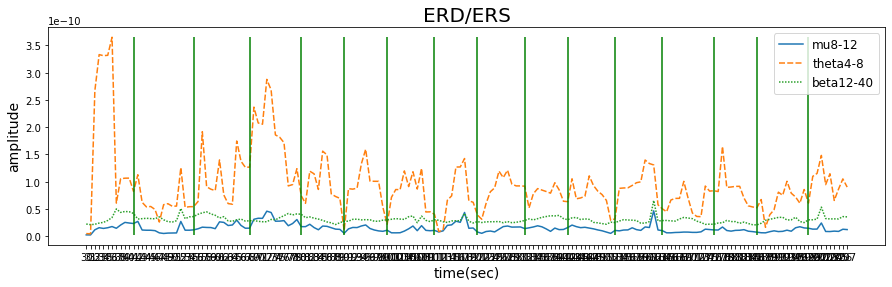

In [6]:
## 주석 부분은 범위 바꿔주고 싶을 때 바꾸면 되는 부분.

import pandas as pd
from datetime import datetime

#  FP1 파일load
fp1_file_name = '2022-06-04_오후 5_51'
click_file_name = '2022-6-4 17.52'


# Fp1_FFT 파일 불러오기
df = pd.read_table('C:/Users/SW/BCI Data/혜진/'+file_name+'/Fp1_FFT.txt',sep='\t',encoding = 'cp949')
#  clicktime 파일load
f = open("C:/Users/SW/BCI Data/혜진_click/"+click_file_name+".txt", "r")

# 보고싶은 주파수 컬럼 만들어주기.
df['mu8-12'] = 0
df['theta4-8'] = 0
df['beta12-40'] = 0


# 해당 주파수 진폭 모아주기 # 이것도 수정 -11
for i in range(1,len(df.columns)-4): # df.columns[i][:-2] -> 헤르츠 정보
    # 마지막 컬럼 세개가 mu,theta,beta 여서 그거 제외한거(-4)
    
    if float(df.columns[i][:-2])>=8 and float(df.columns[i][:-2])<12 : # 뮤파
        df['mu8-12'] += df[df.columns[i]]
    elif float(df.columns[i][:-2])>=4 and float(df.columns[i][:-2])<8: # 세타파
        df['theta4-8'] += df[df.columns[i]]
    elif float(df.columns[i][:-2])>=12 and float(df.columns[i][:-2])<40: # 베타파
        df['beta12-40'] += df[df.columns[i]]

# ClickTime 파일 불러와서 배열에 저장.
# click time 시간포맷 변경해서 리스트에 넣기 오후 ㅁ:ㅁㅁ:ㅁㅁ
# f = open("C:/Users/SW/gazetracker/src/2022-6-10 19.25.txt", "r")
# f = open("C:/Users/SW/BCI Data/혜진_click/2022-6-4 17.52.txt", "r")

click_time = []
while True:
    line = f.readline().strip()
    if not line: break
    click_time.append(line)

click_time_reformat = []
for i in range(len(click_time)):
    times = datetime.strptime(click_time[i][:-7],"%Y-%m-%d %H:%M:%S")
    if int(times.strftime("%H"))>12 :
        h = int(times.strftime("%H"))-12
        time_new =times.strftime("오후 "+ str(h)+":%M:%S")
        click_time_reformat.append(time_new)
    else:
        time_new =times.strftime("오전 %H:%M:%S")
        click_time_reformat.append(time_new)
        

# click에 시간차 0초 1초 인걸로 클릭 타이밍 1로 만들어주기.
df['click'] = 0
df['Time']
for i in range(0,len(df)) : # 뇌파기기에서 찍힌 시간
    df['Time'][i].split('.')
    time_1 = datetime.strptime(df['Time'][i].split('.')[0][3:],"%H:%M:%S") # 10이랑 11 조정해줘야함.
    for j in range(0, len(click_time)): # 클릭버튼 눌러서 찍힌 시간
        time_2 = datetime.strptime(click_time_reformat[j][3:],"%H:%M:%S")
        time_interval = time_2 - time_1
        if str(time_interval) == '0:00:00' or str(time_interval) == '0:00:01':
            print(i,j)
            df['click'][i] += 1
            break
            
# 중복된 click time 제거해주기 (3개까지 동시에 나오는 경우가 있어서 그거 제거 해줌)
for j in range(0,len(df)) : 
    if df['click'][j] == 1:
        if df['click'][j+1] == 1:
            df['click'][j+1] -= 1
            if df['click'][j+2] == 1:
                df['click'][j+2] -= 1
            
            

# 그래프 그리기     
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))

# Line graph by seaborn
# df_=df[['mu8-12','theta4-8','beta12-40']]
df_=df[['mu8-12','theta4-8','beta12-40']]
ax = sns.lineplot(data=df_[30:len(df)])
# ax = sns.lineplot(data=df[df.columns['mu8-12','beta12-16']][60:205])
# ax = sns.lineplot(data=df[df.columns[-4:-1]][50:])
plt.title('ERD/ERS', fontsize=20)
plt.ylabel('amplitude', fontsize=14)

plt.xlabel('time(sec)', fontsize=14)
plt.xticks([i for i in range(30, len(df), 1)])
# plt.xticks([i for i in range(50, len(df), 1)])
plt.legend(fontsize=12, loc='best')

# 세로 녹색 선 : 클릭 시점 표시해주기. 
for i in range(30,len(df)) :
# for i in range(50,len(df)) :
    if df['click'][i] ==1 :
#         min(df['mu8-12'][60:205]),max(df['mu8-12'][60:205])
        min_ = [min(df_[df_.columns[0]][30:]),min(df_[df_.columns[1]][30:]),min(df_[df_.columns[2]][30:])]
        max_ = [max(df_[df_.columns[0]][30:]),max(df_[df_.columns[1]][30:]), max(df_[df_.columns[2]][30:])]
#         min_ = [min(df['beta36-40'][60:205])]
#         max_ = [max(df['beta36-40'][60:205])]
#         min_ = [min(df['mu8-12'][50:]),min(df['beta14-18'][50:]),min(df['beta36-40'][50:])]
#         max_ = [max(df['mu8-12'][50:]),max(df['beta14-18'][50:]),max(df['beta36-40'][50:])]
        plt.vlines(i,min(min_),max(max_), color="green")
plt.show()     

In [ ]:
# # click 시점의 행넘버 리스트에 넣어주기
click_row_num = [] # click 시점의 행넘버

for k in range(len(df)) : 
    if df['click'][k] == 1: # click 시점의 행넘버 구하기
        click_row_num.append(k)

# 데이터프레임 이름 df_click_trial1~15까지 해서 각 trial마다 10초동안의 데이터프레임 잘라서 넣어주기. # 바뀌면 여기 -11 부분 수정
for i in range(len(click_row_num)):
    globals()['df_click_trial{}'.format(i+1)] = df[df.columns[-4:]][click_row_num[i]-5:click_row_num[i]+6]
    
# 데이터프레임 1-15까지 합쳐서 평균 낸 데이터프레임 만들어주기.
df_average=df_click_trial1
df_average.reset_index(drop=True,inplace = True)

for i in range(1,len(click_row_num)):
    df_average+=globals()['df_click_trial{}'.format(i+1)].reset_index(drop=True)
    
df_average=df_average/len(click_row_num)
(after_mu-ref_mu)/ref_mu

### 증감율 구하기 #마이너스면 감소. 플러스면 증가
#뮤
ref_mu = df_average[1:4].mean()[0] # 앞에 3초 데이터
after_mu = df_average[4:7].mean()[0] # 클릭 포함 데이터 
ratio_mu = (after_mu-ref_mu)/ref_mu
print("MU 증감율 :", ratio_mu)

#theta
ref_theta = df_average[1:4].mean()[1] # 앞에 3초 데이터
after_theta = df_average[4:7].mean()[1] # 클릭 포함 데이터 
ratio_theta = (after_theta-ref_theta)/ref_theta
print("Theta 증감율 :", ratio_theta)

#beta
ref_beta = df_average[1:4].mean()[2] # 앞에 3초 데이터
after_beta = df_average[4:7].mean()[2] # 클릭 포함 데이터 
ratio_beta = (after_beta-ref_beta)/ref_beta
print("Beta 증감율 :", ratio_beta)


# average 낸거 그래프 그리기
# beta12-16  beta16-20 beta20-24 beta24-28 beta28-32 beta32-36 beta36-40

# df_ = df_average[['mu8-12','theta4-8','beta12-40']]
df_ = df_average[['mu8-12','theta4-8','beta12-40']]
ax = sns.lineplot(data=df_)
# ax = sns.lineplot(data=df[df.columns[-4:-1]][50:])

plt.title('ERD/ERS', fontsize=20)
plt.ylabel('amplitude', fontsize=14)

plt.xlabel('time(sec)', fontsize=14)
plt.xticks([i for i in range(0, len(df_), 1)])
# plt.xticks([i for i in range(50, len(df), 1)])
plt.legend(fontsize=12, loc='best')

# 세로 녹색 선 : 클릭 시점 표시해주기. 
for i in range(0, len(df_), 1) :
# for i in range(50,len(df)) :
    if df_average['click'][i] == 1 :
        min_ = [min(df_[df_.columns[0]]),min(df_[df_.columns[1]]),min(df_[df_.columns[2]])]
        max_ = [max(df_[df_.columns[0]]),max(df_[df_.columns[1]]),max(df_[df_.columns[2]])]
#         min_ = [min(df['mu8-12'][30:]),min(df['beta14-18'][50:]),min(df['beta36-40'][50:])]
#         max_ = [max(df['mu8-12'][50:]),max(df['beta14-18'][50:]),max(df['beta36-40'][50:])]
        plt.vlines(i,min(min_),max(max_), color="green")
    

plt.show()     